Purpose: Establish genotype groupings by physiology, as described on p. 157 of the Computational Log.<br>
Author: Anna Pardo<br>
Date initiated: Dec. 18, 2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load Yg physiology data (from Karolina, merged with RNA metadata)
yglicor = pd.read_excel("yglor_rnalibs_physiology.xlsx")

In [3]:
# load parental LICOR data
parlicor = pd.read_excel("../yayf_licordata_static.xlsx")
parlicor.head()

,species,genotype,treat,zt,Obs,HHMMSS,FTime,EBal?,Photo,Cond,...,N(Flow),MN(Flow),SD(Flow),CV(Flow),SLP(Flow),N(Photo),MN(Photo),SD(Photo),CV(Photo),SLP(Photo)
0,YA,24,watered,zt1,1,07:11:32,836.500006,0,-0.061126,0.002761,...,30,499.925845,0.069663,0.013935,-0.470766,40,-0.019057,0.025251,132.506014,0.131924
1,YA,17,watered,zt1,2,07:14:43,1027.500002,0,0.070535,0.001769,...,30,499.910292,0.039596,0.007921,-0.311087,40,-0.085482,0.055459,64.878577,0.212207
2,YA,7,watered,zt1,3,07:18:24,1248.499997,0,0.016539,0.013230,...,30,499.928354,0.069858,0.013974,-0.024098,40,0.053310,0.033747,63.303928,0.192343
3,YF,91,watered,zt1,4,07:23:41,1566.499990,0,6.937467,0.098679,...,30,499.948952,0.047779,0.009557,0.199538,40,6.925235,0.095622,1.380771,0.518893
4,YF,81,watered,zt1,5,07:26:23,1727.999986,0,8.740435,0.106146,...,30,499.949029,0.064605,0.012922,-0.311421,40,4.327180,0.094220,2.177396,0.816073


In [5]:
yglicor.head()

,sample_name,collectionDate,genotype,time,treat,ZT,batch,RNAsample#,fullID,fullIDtreat,photo,cond
0,Y111,2016-04-01 00:00:00,18,1.0,D,1.0,2016.April,NaN,18.2.3.2015,18.2.3.2015_D_1,2.627596,0.026132
1,Y123,2016-04-01 00:00:00,18,1.0,D,1.0,2016.April,NaN,18.2.4.2015,18.2.4.2015_D_1,2.679172,0.021603
2,Y117,2016-04-01 00:00:00,18,1.0,D,NaN,2016.April,NaN,18.1.1.2015,18.1.1.2015_D_,NaN,NaN
3,Y120,2016-04-01 00:00:00,18,1.5,D,3.0,2016.April,NaN,18.1.1.2015,18.1.1.2015_D_3,1.211527,0.007856
4,Y125,2016-04-01 00:00:00,18,1.5,D,3.0,2016.April,NaN,18.2.3.2015,18.2.3.2015_D_3,1.289725,0.009783


In [6]:
yglicor = yglicor[["genotype","treat","ZT","photo","cond"]]
yglicor["species"] = "YG"
yglicor.head()

/tmp/ipykernel_3232/988396639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yglicor["species"] = "YG"


,genotype,treat,ZT,photo,cond,species
0,18,D,1.0,2.627596,0.026132,YG
1,18,D,1.0,2.679172,0.021603,YG
2,18,D,NaN,NaN,NaN,YG
3,18,D,3.0,1.211527,0.007856,YG
4,18,D,3.0,1.289725,0.009783,YG


In [7]:
yglicor.dropna(axis=0,inplace=True)
yglicor = yglicor[["species","genotype","treat","ZT","photo","cond"]]
yglicor.head()

/tmp/ipykernel_3232/4041200947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yglicor.dropna(axis=0,inplace=True)


,species,genotype,treat,ZT,photo,cond
0,YG,18,D,1.0,2.627596,0.026132
1,YG,18,D,1.0,2.679172,0.021603
3,YG,18,D,3.0,1.211527,0.007856
4,YG,18,D,3.0,1.289725,0.009783
5,YG,18,D,3.0,1.549238,0.010471


In [8]:
parlicor = parlicor[["species","genotype","treat","zt","Photo","Cond"]].rename(columns={"zt":"ZT","Photo":"photo","Cond":"cond"})
parlicor.head()

,species,genotype,treat,ZT,photo,cond
0,YA,24,watered,zt1,-0.061126,0.002761
1,YA,17,watered,zt1,0.070535,0.001769
2,YA,7,watered,zt1,0.016539,0.013230
3,YF,91,watered,zt1,6.937467,0.098679
4,YF,81,watered,zt1,8.740435,0.106146


In [9]:
parlicor["treat"].unique()

array(['watered', 'drought'], dtype=object)

In [10]:
# fix treat column in parlicor
parlicor["treat"] = parlicor["treat"].map({"watered":"W","drought":"D"})
parlicor.head()

,species,genotype,treat,ZT,photo,cond
0,YA,24,W,zt1,-0.061126,0.002761
1,YA,17,W,zt1,0.070535,0.001769
2,YA,7,W,zt1,0.016539,0.013230
3,YF,91,W,zt1,6.937467,0.098679
4,YF,81,W,zt1,8.740435,0.106146


In [11]:
parlicor["ZT"].unique()

array(['zt1', 'zt5', 'zt9', 'zt13', 'zt17', 'zt21', 'zt25'], dtype=object)

In [12]:
yglicor["ZT"].unique()

array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23.])

In [13]:
# drop zt25 (Karolina says this was probably a mistake)
parlicor = parlicor[parlicor["ZT"]!="zt25"]

In [14]:
parlicor["ZT"].unique()

array(['zt1', 'zt5', 'zt9', 'zt13', 'zt17', 'zt21'], dtype=object)

In [15]:
parlicor["ZT"] = parlicor["ZT"].map({"zt1":1.0,"zt5":5.0,"zt9":9.0,"zt13":13.0,"zt17":17.0,"zt21":21.0})

/tmp/ipykernel_3232/670918364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parlicor["ZT"] = parlicor["ZT"].map({"zt1":1.0,"zt5":5.0,"zt9":9.0,"zt13":13.0,"zt17":17.0,"zt21":21.0})


In [16]:
parlicor.head()

,species,genotype,treat,ZT,photo,cond
0,YA,24,W,1.0,-0.061126,0.002761
1,YA,17,W,1.0,0.070535,0.001769
2,YA,7,W,1.0,0.016539,0.013230
3,YF,91,W,1.0,6.937467,0.098679
4,YF,81,W,1.0,8.740435,0.106146


In [17]:
yglicor.head()

,species,genotype,treat,ZT,photo,cond
0,YG,18,D,1.0,2.627596,0.026132
1,YG,18,D,1.0,2.679172,0.021603
3,YG,18,D,3.0,1.211527,0.007856
4,YG,18,D,3.0,1.289725,0.009783
5,YG,18,D,3.0,1.549238,0.010471


In [29]:
parlicor["genotype"] = parlicor["genotype"].astype(str)
yglicor["genotype"] = yglicor["genotype"].astype(str)

In [30]:
yglicor["genotype"].unique()

array(['18', '1AB', '2AB', '15', '46', 'Eu', '13', '19', '45', 'G', '36',
       '37', '48', '53', '56', '16', '52', '51', '55', '61', '70', '43'],
      dtype=object)

In [31]:
yglicor["genotype"] = yglicor["genotype"].replace(to_replace="Eu",value="Eudy")

In [32]:
# stick all data together
licor = pd.concat([yglicor,parlicor])

In [41]:
len(licor.index)

1156

In [40]:
licor["ZT"].unique()

array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23.])

In [42]:
# put together a day/night column
licor["DayNight"] = licor["ZT"].map({1.0:"day",5.0:"day",9.0:"day",3.0:"day",7.0:"day",11.0:"day",
                                     13.0:"night",17.0:"night",21.0:"night",15.0:"night",19.0:"night",23.0:"night"})
licor.head()

,species,genotype,treat,ZT,photo,cond,DayNight
0,YG,18,D,1.0,2.627596,0.026132,day
1,YG,18,D,1.0,2.679172,0.021603,day
3,YG,18,D,3.0,1.211527,0.007856,day
4,YG,18,D,3.0,1.289725,0.009783,day
5,YG,18,D,3.0,1.549238,0.010471,day


In [43]:
# check number of replicates
reps = licor.groupby(["species","genotype","treat","DayNight"]).count().reset_index()[["species","genotype","treat","DayNight","photo"]].rename(columns={"photo":"nreps"})


In [44]:
reps[reps["species"]=="YG"]["nreps"].unique()

array([10, 13, 12, 14, 11,  8,  9, 17, 18, 16,  7,  5, 15])

In [46]:
reps[reps["species"]=="YA"]["nreps"].unique()

array([2, 3])

In [47]:
reps[reps["species"]=="YF"]["nreps"].unique()

array([2, 3])

In [45]:
reps.head()

,species,genotype,treat,DayNight,nreps
0,YA,17,D,day,2
1,YA,17,D,night,3
2,YA,17,W,day,3
3,YA,17,W,night,3
4,YA,23,D,day,2


## Calculate LICOR-data deltas (photo & cond)

In [50]:
licor.head()

,species,genotype,treat,ZT,photo,cond,DayNight
0,YG,18,D,1.0,2.627596,0.026132,day
1,YG,18,D,1.0,2.679172,0.021603,day
3,YG,18,D,3.0,1.211527,0.007856,day
4,YG,18,D,3.0,1.289725,0.009783,day
5,YG,18,D,3.0,1.549238,0.010471,day


In [51]:
# save licor, just in case
licor.to_csv("../licor_data_all_species_clean.csv",sep=",",header=True,index=False)

In [52]:
len(licor["genotype"].unique())==len(yglicor["genotype"].unique())+len(parlicor["genotype"].unique())

True

In [78]:
# function to calculate day/night delta by treatment for a single genotype and a given physiological marker
def licordelta(gt,phys,df=licor):
    if gt in ["YA","YF"]:
        gtdf = df[df["species"]==gt]
    else:
        gtdf = df[df["genotype"]==gt]
        
    means = gtdf[["treat","DayNight",phys]].groupby(["treat","DayNight"]).mean().reset_index()
    widemeans = means.pivot(index=["treat"],columns="DayNight",values=phys).reset_index()
    widemeans["species"] = gtdf["species"].unique()[0]
    widemeans["genotype"] = gt
    widemeans[phys+"_delta"] = widemeans["night"] - widemeans["day"]
    
    return widemeans

In [71]:
# make list of genotypes for which to run this
gtl = ["YA","YF"]+list(yglicor["genotype"].unique())

In [79]:
photolist = []
condlist = []
for g in gtl:
    photolist.append(licordelta(g,"photo"))
    condlist.append(licordelta(g,"cond"))

In [80]:
pdelta = pd.concat(photolist)

In [81]:
cdelta = pd.concat(condlist)

In [82]:
cdelta.head()

DayNight,treat,day,night,species,genotype,cond_delta
0,D,-0.001445,0.002530,YA,YA,0.003975
1,W,0.009946,0.019993,YA,YA,0.010047
0,D,0.001645,-0.002772,YF,YF,-0.004417
1,W,0.052403,0.003267,YF,YF,-0.049135
0,D,0.015273,0.008130,YG,18,-0.007143


In [83]:
pdelta.head()

DayNight,treat,day,night,species,genotype,photo_delta
0,D,-0.011242,0.986870,YA,YA,0.998113
1,W,1.165651,3.626664,YA,YA,2.461013
0,D,0.587537,-0.298389,YF,YF,-0.885926
1,W,4.700796,-0.482621,YF,YF,-5.183417
0,D,1.971662,0.347119,YG,18,-1.624543


In [85]:
alldelta = pdelta[["treat","species","genotype","photo_delta"]].merge(cdelta[["treat","species","genotype","cond_delta"]])

In [86]:
alldelta.head()

DayNight,treat,species,genotype,photo_delta,cond_delta
0,D,YA,YA,0.998113,0.003975
1,W,YA,YA,2.461013,0.010047
2,D,YF,YF,-0.885926,-0.004417
3,W,YF,YF,-5.183417,-0.049135
4,D,YG,18,-1.624543,-0.007143


In [89]:
# reshape the data so there is a column for each physiology delta in each treatment
drought = alldelta[alldelta["treat"]=="D"]
water = alldelta[alldelta["treat"]=="W"]

In [90]:
drought.rename(columns={"photo_delta":"photo_delta_D","cond_delta":"cond_delta_D"},inplace=True)
water.rename(columns={"photo_delta":"photo_delta_W","cond_delta":"cond_delta_W"},inplace=True)

/tmp/ipykernel_3232/3137232412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drought.rename(columns={"photo_delta":"photo_delta_D","cond_delta":"cond_delta_D"},inplace=True)
/tmp/ipykernel_3232/3137232412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water.rename(columns={"photo_delta":"photo_delta_W","cond_delta":"cond_delta_W"},inplace=True)


In [92]:
drought.drop("treat",axis=1,inplace=True)
water.drop("treat",axis=1,inplace=True)

/tmp/ipykernel_3232/2621742350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drought.drop("treat",axis=1,inplace=True)
/tmp/ipykernel_3232/2621742350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water.drop("treat",axis=1,inplace=True)


In [94]:
allplot = drought.merge(water)

In [95]:
allplot.head()

DayNight,species,genotype,photo_delta_D,cond_delta_D,photo_delta_W,cond_delta_W
0,YA,YA,0.998113,0.003975,2.461013,0.010047
1,YF,YF,-0.885926,-0.004417,-5.183417,-0.049135
2,YG,18,-1.624543,-0.007143,-3.821684,-0.031201
3,YG,1AB,-0.709479,0.002188,-4.964144,-0.038022
4,YG,2AB,-0.236625,0.006727,-4.330409,-0.031465


In [97]:
len(allplot["genotype"].unique())

24

In [99]:
allplot.sort_values("species",ascending=False,inplace=True)

In [100]:
allplot["species"] = allplot["species"].map({"YA":"Ya","YF":"Yf","YG":"Yg"})

In [106]:
allplot["genotype"] = allplot["genotype"].replace({"YA":"Ya","YF":"Yf"})

In [108]:
allplot["genotype"].unique()

array(['36', '37', '70', '61', '55', '51', '52', '16', '56', '53', '48',
       '43', 'G', '45', '19', '13', 'Eudy', '46', '15', '2AB', '1AB',
       '18', 'Yf', 'Ya'], dtype=object)

In [109]:
# create a custom palette with 24 values
custompal = {
    "Ya":"gold",
    "Yf":"blue",
    "36":"darkgreen",
    "37":"royalblue",
    "70":"firebrick",
    "61":"saddlebrown",
    "55":"darkslategrey",
    "51":"rebeccapurple",
    "52":"lawngreen",
    "16":"darkgoldenrod",
    "56":"deeppink",
    "53":"peru",
    "48":"turquoise",
    "43":"orchid",
    "G":"lightcoral",
    "45":"skyblue",
    "19":"mediumseagreen",
    "13":"tan",
    "Eudy":"olive",
    "46":"gray",
    "15":"orangered",
    "2AB":"sandybrown",
    "1AB":"olivedrab",
    "18":"mediumslateblue"
}

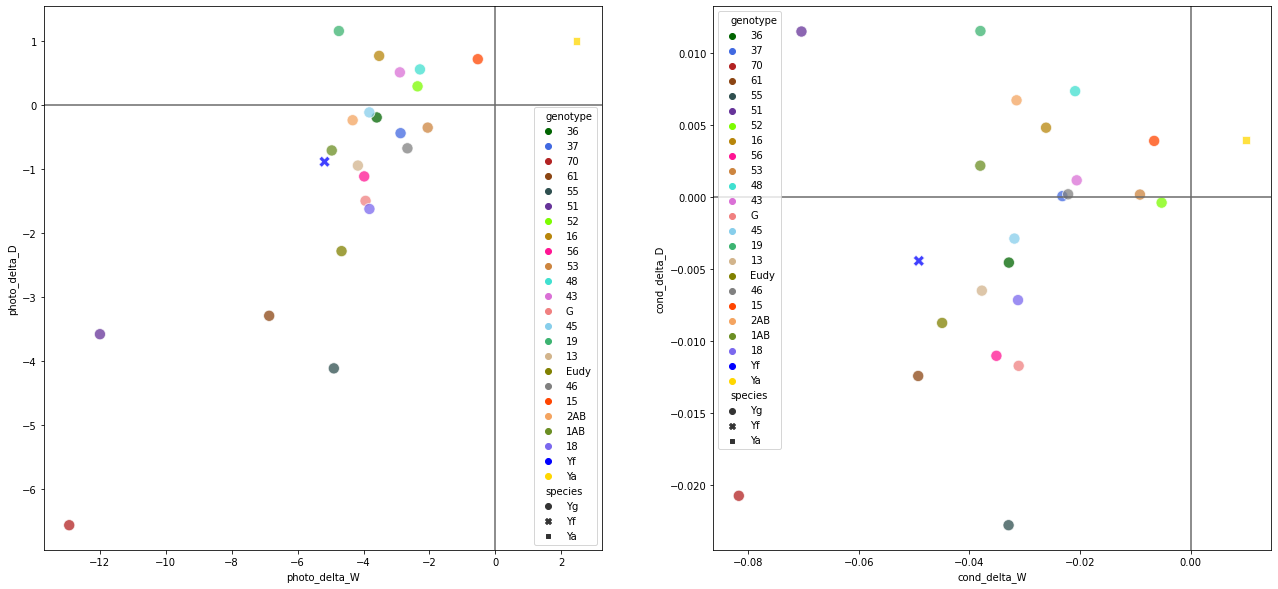

In [119]:
# plot to see if there is any obvious grouping
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(22,10))

sns.scatterplot(ax=ax[0],data=allplot,x="photo_delta_W",y="photo_delta_D",style="species",hue="genotype",
                palette=custompal,s=125,alpha=0.75)
sns.scatterplot(ax=ax[1],data=allplot,x="cond_delta_W",y="cond_delta_D",style="species",hue="genotype",
                palette=custompal,s=125,alpha=0.75)

ax[0].axhline(y=0,color="dimgray")
ax[1].axhline(y=0,color="dimgray")

ax[0].axvline(x=0,color="dimgray")
ax[1].axvline(x=0,color="dimgray")

In [120]:
# repeat this plot with each genotype of Ya & Yf split out
# also make error bars
## first: new genotype list
gtlist = list(licor["genotype"].unique())

In [138]:
def eblicordelta(gt,phys,df=licor):
    gtdf = df[df["genotype"]==gt]
        
    means = gtdf[["treat","DayNight",phys]].groupby(["treat","DayNight"]).mean().reset_index()
    widemeans = means.pivot(index=["treat"],columns="DayNight",values=phys).reset_index()
    widemeans["species"] = gtdf["species"].unique()[0]
    widemeans["genotype"] = gt
    widemeans[phys+"_delta"] = widemeans["night"] - widemeans["day"]
    
    # compute sd
    sd = gtdf[["treat","DayNight",phys]].groupby(["treat","DayNight"]).std().reset_index()
    sdwide = sd.pivot(index="treat",columns="DayNight",values=phys).reset_index().rename(columns={
        "day":"day_sd","night":"night_sd"
    })
    # count sample sizes
    sampsize = gtdf[["treat","DayNight",phys]].groupby(["treat","DayNight"]).count().reset_index()
    sswide = sampsize.pivot(index="treat",columns="DayNight",values=phys).reset_index().rename(columns={"day":"day_n","night":"night_n"})
    
    # now compute SE of difference of means
    widemeans[phys+"_se_delta"] = np.sqrt((sdwide["day_sd"]**2/sswide["day_n"])+(sdwide["night_sd"]**2/sswide["night_n"]))
    
    return widemeans

In [139]:
eblicordelta("18","photo")

DayNight,treat,day,night,species,genotype,photo_delta,photo_se_delta
0,D,1.971662,0.347119,YG,18,-1.624543,0.201811
1,W,4.010989,0.189305,YG,18,-3.821684,0.219126


In [140]:
licor["species"] = licor["species"].map({"YA":"Ya","YG":"Yg","YF":"Yf"})
licor.head()

,species,genotype,treat,ZT,photo,cond,DayNight
0,Yg,18,D,1.0,2.627596,0.026132,day
1,Yg,18,D,1.0,2.679172,0.021603,day
3,Yg,18,D,3.0,1.211527,0.007856,day
4,Yg,18,D,3.0,1.289725,0.009783,day
5,Yg,18,D,3.0,1.549238,0.010471,day


In [141]:
photolist = []
condlist = []
for g in gtlist:
    photolist.append(eblicordelta(g,"photo"))
    condlist.append(eblicordelta(g,"cond"))

In [142]:
photo = pd.concat(photolist)
cond = pd.concat(condlist)

In [143]:
photo.head()

DayNight,treat,day,night,species,genotype,photo_delta,photo_se_delta
0,D,1.971662,0.347119,Yg,18,-1.624543,0.201811
1,W,4.010989,0.189305,Yg,18,-3.821684,0.219126
0,D,1.429938,0.720459,Yg,1AB,-0.709479,0.361320
1,W,5.784280,0.820136,Yg,1AB,-4.964144,0.248441
0,D,0.930979,0.694354,Yg,2AB,-0.236625,0.113086


In [144]:
physres = photo[["treat","species","genotype","photo_delta","photo_se_delta"]].merge(cond[["treat","species","genotype",
                                                                                          "cond_delta","cond_se_delta"]])

In [145]:
physres.head()

DayNight,treat,species,genotype,photo_delta,photo_se_delta,cond_delta,cond_se_delta
0,D,Yg,18,-1.624543,0.201811,-0.007143,0.002081
1,W,Yg,18,-3.821684,0.219126,-0.031201,0.002785
2,D,Yg,1AB,-0.709479,0.361320,0.002188,0.003018
3,W,Yg,1AB,-4.964144,0.248441,-0.038022,0.002709
4,D,Yg,2AB,-0.236625,0.113086,0.006727,0.002183


In [146]:
def resbytreat(t,resdf=physres):
    tdf = resdf[resdf["treat"]==t]
    for c in tdf.columns:
        if "delta" in c:
            tdf.rename(columns={c:c+"_"+t},inplace=True)
    tdf.drop("treat",axis=1,inplace=True)
    return tdf

In [147]:
dres = resbytreat("D")
wres = resbytreat("W")
wres.head()

/tmp/ipykernel_3232/30955016.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf.rename(columns={c:c+"_"+t},inplace=True)
/tmp/ipykernel_3232/30955016.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf.rename(columns={c:c+"_"+t},inplace=True)
/tmp/ipykernel_3232/30955016.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf.rename(columns={c:c+"_"+t},inplace=True)
/tmp/ipykernel_3232/30955016.py:5: SettingWithCopyWarning: 
A

DayNight,species,genotype,photo_delta_W,photo_se_delta_W,cond_delta_W,cond_se_delta_W
1,Yg,18,-3.821684,0.219126,-0.031201,0.002785
3,Yg,1AB,-4.964144,0.248441,-0.038022,0.002709
5,Yg,2AB,-4.330409,0.208074,-0.031465,0.003789
7,Yg,15,-0.533199,0.888824,-0.006579,0.006285
9,Yg,46,-2.668693,0.807254,-0.022137,0.006661


In [148]:
allres = wres.merge(dres)
allres.head()

DayNight,species,genotype,photo_delta_W,photo_se_delta_W,cond_delta_W,cond_se_delta_W,photo_delta_D,photo_se_delta_D,cond_delta_D,cond_se_delta_D
0,Yg,18,-3.821684,0.219126,-0.031201,0.002785,-1.624543,0.201811,-0.007143,0.002081
1,Yg,1AB,-4.964144,0.248441,-0.038022,0.002709,-0.709479,0.361320,0.002188,0.003018
2,Yg,2AB,-4.330409,0.208074,-0.031465,0.003789,-0.236625,0.113086,0.006727,0.002183
3,Yg,15,-0.533199,0.888824,-0.006579,0.006285,0.718232,0.185340,0.003907,0.001276
4,Yg,46,-2.668693,0.807254,-0.022137,0.006661,-0.675808,0.399046,0.000203,0.003595


In [6]:
# fix custom palette
custompal = {
    "36":"darkgreen",
    "37":"royalblue",
    "70":"firebrick",
    "61":"saddlebrown",
    "55":"darkslategrey",
    "51":"rebeccapurple",
    "52":"lawngreen",
    "16":"darkgoldenrod",
    "56":"deeppink",
    "53":"peru",
    "48":"turquoise",
    "43":"orchid",
    "G":"lightcoral",
    "45":"skyblue",
    "19":"mediumseagreen",
    "13":"tan",
    "Eudy":"olive",
    "46":"gray",
    "15":"orangered",
    "2AB":"sandybrown",
    "1AB":"olivedrab",
    "18":"mediumslateblue"
}

In [7]:
for s in ["Ya","Yf"]:
    sdf = allres[allres["species"]==s]
    for i in sdf["genotype"].unique():
        if s=="Ya":
            custompal[i] = "gold"
        else:
            custompal[i] = "blue"

In [8]:
custompal

{'36': 'darkgreen',
 '37': 'royalblue',
 '70': 'firebrick',
 '61': 'saddlebrown',
 '55': 'darkslategrey',
 '51': 'rebeccapurple',
 '52': 'lawngreen',
 '16': 'darkgoldenrod',
 '56': 'deeppink',
 '53': 'peru',
 '48': 'turquoise',
 '43': 'orchid',
 'G': 'lightcoral',
 '45': 'skyblue',
 '19': 'mediumseagreen',
 '13': 'tan',
 'Eudy': 'olive',
 '46': 'gray',
 '15': 'orangered',
 '2AB': 'sandybrown',
 '1AB': 'olivedrab',
 '18': 'mediumslateblue',
 '32': 'gold',
 '7': 'gold',
 '3': 'gold',
 '24': 'gold',
 '23': 'gold',
 '17': 'gold',
 '84': 'blue',
 '90': 'blue',
 '80': 'blue',
 '88': 'blue',
 '98': 'blue',
 '81': 'blue',
 '91': 'blue'}

In [155]:
allres.sort_values("species",ascending=False,inplace=True)

In [157]:
allres.head()

DayNight,species,genotype,photo_delta_W,photo_se_delta_W,cond_delta_W,cond_se_delta_W,photo_delta_D,photo_se_delta_D,cond_delta_D,cond_se_delta_D
0,Yg,18,-3.821684,0.219126,-0.031201,0.002785,-1.624543,0.201811,-0.007143,0.002081
12,Yg,48,-2.288366,0.598488,-0.020870,0.005956,0.558297,0.303311,0.007360,0.001799
21,Yg,43,-2.897358,0.344567,-0.020584,0.002659,0.512161,0.227245,0.001173,0.000822
20,Yg,70,-12.929507,0.995204,-0.081691,0.007796,-6.571107,1.837028,-0.020726,0.011786
19,Yg,61,-6.862964,1.015016,-0.049251,0.005818,-3.295913,1.119586,-0.012409,0.006775


In [166]:
allres["color"] = allres["genotype"].map(custompal)

In [188]:
yggts = list(yglicor["genotype"].unique())

In [192]:
custompal.keys()

dict_keys(['36', '37', '70', '61', '55', '51', '52', '16', '56', '53', '48', '43', 'G', '45', '19', '13', 'Eudy', '46', '15', '2AB', '1AB', '18', '24', '17', '7', '32', '3', '23', '91', '81', '84', '88', '80', '90', '98'])

In [193]:
labels = []
for k in custompal.keys():
    if k in yggts:
        labels.append(k)

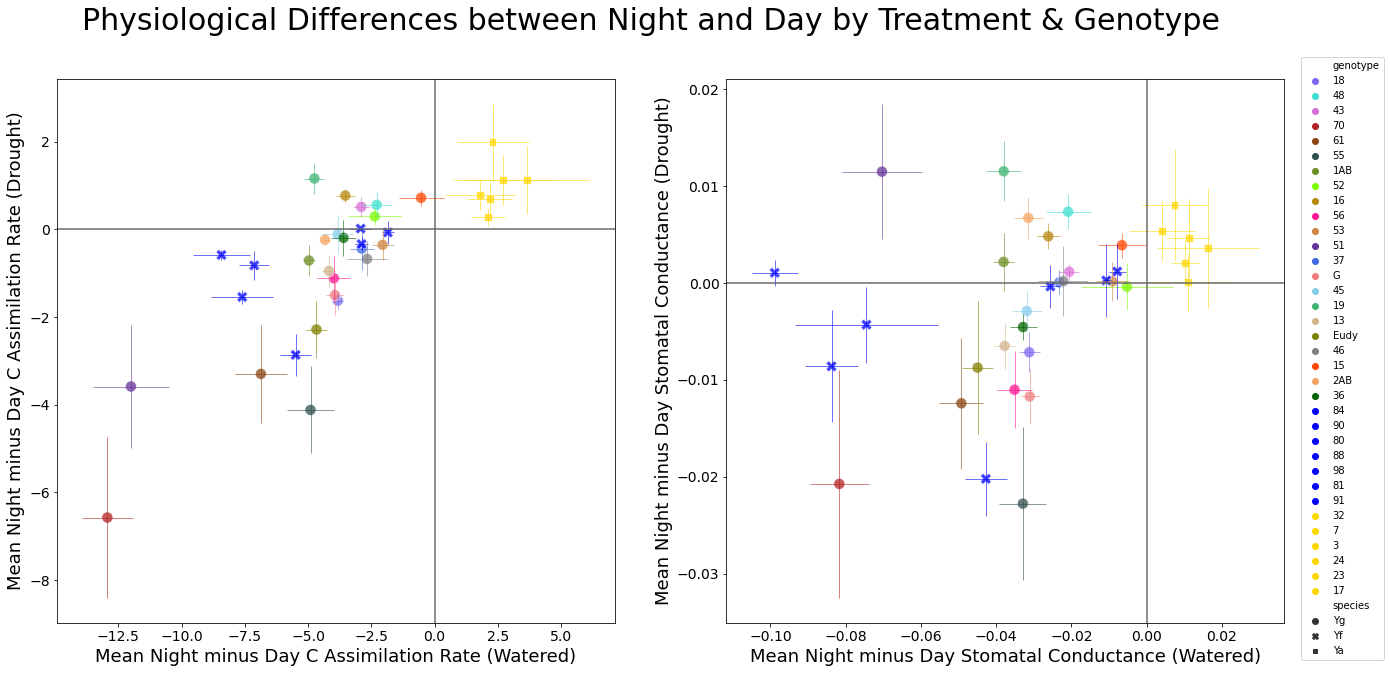

In [208]:
# plot to see if there is any obvious grouping
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(22,10))

sns.scatterplot(ax=ax[0],data=allres,x="photo_delta_W",y="photo_delta_D",style="species",hue="genotype",
                palette=custompal,s=125,alpha=0.75)
sns.scatterplot(ax=ax[1],data=allres,x="cond_delta_W",y="cond_delta_D",style="species",hue="genotype",
                palette=custompal,s=125,alpha=0.75)

# plot error bars
ax[0].errorbar(allres["photo_delta_W"],allres["photo_delta_D"],xerr=allres["photo_se_delta_W"],yerr=allres["photo_se_delta_D"],
              fmt="o",alpha=0.75,ecolor=allres["color"],markersize=0,elinewidth=0.75)
ax[1].errorbar(allres["cond_delta_W"],allres["cond_delta_D"],xerr=allres["cond_se_delta_W"],yerr=allres["cond_se_delta_D"],
              fmt="o",alpha=0.75,ecolor=allres["color"],markersize=0,elinewidth=0.75)

ax[0].axhline(y=0,color="dimgray")
ax[1].axhline(y=0,color="dimgray")

ax[0].axvline(x=0,color="dimgray")
ax[1].axvline(x=0,color="dimgray")

# customize (a single) legend
ax[0].get_legend().remove()
ax[1].legend(bbox_to_anchor=(1.02,1.05))

# customize axes & titles
ax[0].tick_params(axis="both",which="major",labelsize=14)
ax[1].tick_params(axis="both",which="major",labelsize=14)

ax[0].set_xlabel("Mean Night minus Day C Assimilation Rate (Watered)",fontsize=18)
ax[0].set_ylabel("Mean Night minus Day C Assimilation Rate (Drought)",fontsize=18)

ax[1].set_xlabel("Mean Night minus Day Stomatal Conductance (Watered)",fontsize=18)
ax[1].set_ylabel("Mean Night minus Day Stomatal Conductance (Drought)",fontsize=18)

plt.suptitle("Physiological Differences between Night and Day by Treatment & Genotype",fontsize=30)

plt.savefig("../phys_figures/18-Dec-2025_licorphys_deltanightday_treatgt.png",dpi=200,bbox_inches="tight")
plt.savefig("../phys_figures/18-Dec-2025_licorphys_deltanightday_treatgt.pdf",dpi=200,bbox_inches="tight")
plt.savefig("../phys_figures/18-Dec-2025_licorphys_deltanightday_treatgt.svg",dpi=200,bbox_inches="tight")

In [209]:
# save allres
allres.to_csv("../phys_figures/deltas_treatgt_licorphys.csv",sep=",",header=True,index=False)

## Dec. 22: Make partial plots for slides

In [2]:
# reload allres
allres = pd.read_csv("../phys_figures/deltas_treatgt_licorphys.csv",sep=",",header="infer")
allres.head()

,species,genotype,photo_delta_W,photo_se_delta_W,cond_delta_W,cond_se_delta_W,photo_delta_D,photo_se_delta_D,cond_delta_D,cond_se_delta_D,color
0,Yg,18,-3.821684,0.219126,-0.031201,0.002785,-1.624543,0.201811,-0.007143,0.002081,mediumslateblue
1,Yg,48,-2.288366,0.598488,-0.020870,0.005956,0.558297,0.303311,0.007360,0.001799,turquoise
2,Yg,43,-2.897358,0.344567,-0.020584,0.002659,0.512161,0.227245,0.001173,0.000822,orchid
3,Yg,70,-12.929507,0.995204,-0.081691,0.007796,-6.571107,1.837028,-0.020726,0.011786,firebrick
4,Yg,61,-6.862964,1.015016,-0.049251,0.005818,-3.295913,1.119586,-0.012409,0.006775,saddlebrown


In [4]:
par = allres[allres["species"]!="Yg"]

Text(0, 0.5, 'Mean Night minus Day Stomatal Conductance (Drought)')

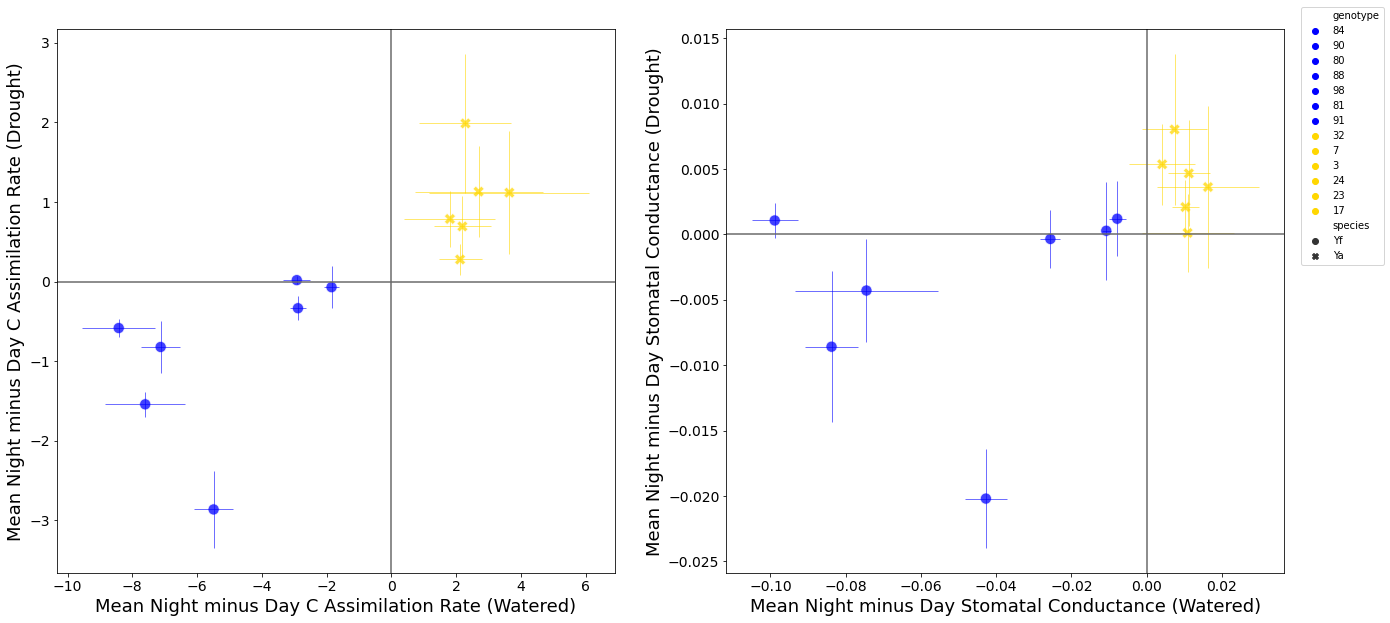

In [9]:
# plot parental data only
# plot to see if there is any obvious grouping
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(22,10))

sns.scatterplot(ax=ax[0],data=par,x="photo_delta_W",y="photo_delta_D",style="species",hue="genotype",
                palette=custompal,s=125,alpha=0.75)
sns.scatterplot(ax=ax[1],data=par,x="cond_delta_W",y="cond_delta_D",style="species",hue="genotype",
                palette=custompal,s=125,alpha=0.75)

# plot error bars
ax[0].errorbar(par["photo_delta_W"],par["photo_delta_D"],xerr=par["photo_se_delta_W"],yerr=par["photo_se_delta_D"],
              fmt="o",alpha=0.75,ecolor=par["color"],markersize=0,elinewidth=0.75)
ax[1].errorbar(par["cond_delta_W"],par["cond_delta_D"],xerr=par["cond_se_delta_W"],yerr=par["cond_se_delta_D"],
              fmt="o",alpha=0.75,ecolor=par["color"],markersize=0,elinewidth=0.75)

ax[0].axhline(y=0,color="dimgray")
ax[1].axhline(y=0,color="dimgray")

ax[0].axvline(x=0,color="dimgray")
ax[1].axvline(x=0,color="dimgray")

# customize (a single) legend
ax[0].get_legend().remove()
ax[1].legend(bbox_to_anchor=(1.02,1.05))

# customize axes & titles
ax[0].tick_params(axis="both",which="major",labelsize=14)
ax[1].tick_params(axis="both",which="major",labelsize=14)

ax[0].set_xlabel("Mean Night minus Day C Assimilation Rate (Watered)",fontsize=18)
ax[0].set_ylabel("Mean Night minus Day C Assimilation Rate (Drought)",fontsize=18)

ax[1].set_xlabel("Mean Night minus Day Stomatal Conductance (Watered)",fontsize=18)
ax[1].set_ylabel("Mean Night minus Day Stomatal Conductance (Drought)",fontsize=18)

#plt.suptitle("Physiological Differences between Night and Day by Treatment & Genotype",fontsize=30)

#plt.savefig("../phys_figures/18-Dec-2025_licorphys_deltanightday_treatgt.png",dpi=200,bbox_inches="tight")
#plt.savefig("../phys_figures/18-Dec-2025_licorphys_deltanightday_treatgt.pdf",dpi=200,bbox_inches="tight")
#plt.savefig("../phys_figures/18-Dec-2025_licorphys_deltanightday_treatgt.svg",dpi=200,bbox_inches="tight")

## Repeat for titratable acidity

In [210]:
# load titratable acidity data
ta = pd.read_csv("../All_titrations_raw.csv",sep=",",header="infer")
ta.head()

,Sample,Rep,Date,Time,Month,genotype,specific,initial pH,titrated ul 6.5,titrated ul 7.0,H+ uq/g
0,66,1,42957.0,D1PM,17-Aug,61,61.1.3.2016,5.96,926,2026,54.75675676
1,66,2,42957.0,D1PM,17-Aug,61,61.1.3.2016,5.77,1100,2200,55.97964377
2,66,3,42957.0,D1PM,17-Aug,61,61.1.3.2016,5.52,NaN,2400,76.31160572
3,67,1,42957.0,D1PM,17-Aug,61,61.2.0.2015,4.74,3600,4520,100.8928571
4,67,2,42957.0,D1PM,17-Aug,61,61.2.0.2015,6.18,800,2800,58.27263267


In [211]:
ta.rename(columns={"H+ uq/g":"acidity_uq/g"},inplace=True)
ta.head()

,Sample,Rep,Date,Time,Month,genotype,specific,initial pH,titrated ul 6.5,titrated ul 7.0,acidity_uq/g
0,66,1,42957.0,D1PM,17-Aug,61,61.1.3.2016,5.96,926,2026,54.75675676
1,66,2,42957.0,D1PM,17-Aug,61,61.1.3.2016,5.77,1100,2200,55.97964377
2,66,3,42957.0,D1PM,17-Aug,61,61.1.3.2016,5.52,NaN,2400,76.31160572
3,67,1,42957.0,D1PM,17-Aug,61,61.2.0.2015,4.74,3600,4520,100.8928571
4,67,2,42957.0,D1PM,17-Aug,61,61.2.0.2015,6.18,800,2800,58.27263267


In [212]:
ta["genotype"].unique()

array(['61', '70', '55', '51', '16', '56', '12', '52', '53', '36', '48',
       '37', '43', '46', 'Eudy', '15', '20', 'G', '19', '13', '45', '1AB',
       '18', '2AB', 'Eudy3', 'Eudy1', 'Eudy4', 'Eudy2'], dtype=object)

In [213]:
ta["genotype"].replace({"Eudy3":"Eudy","Eudy1":"Eudy","Eudy4":"Eudy","Eudy2":"Eudy"},inplace=True)

In [214]:
ta["genotype"].unique()

array(['61', '70', '55', '51', '16', '56', '12', '52', '53', '36', '48',
       '37', '43', '46', 'Eudy', '15', '20', 'G', '19', '13', '45', '1AB',
       '18', '2AB'], dtype=object)

In [215]:
for g in ta["genotype"].unique():
    if g not in yggts:
        print(g)

12
20


In [239]:
# load TA for Ya (Yf is irrelevant, all values 0)
yata = pd.read_csv("../YA_TA.csv",sep=",",header="infer")

In [240]:
yata.head()

,Genotype,Time,Treatment,Weight_g,pH_start,ul_pH6.5,ul_pH7.0,Total_ul,ul_per_mg,umol_NaOH_per_mg,umol_NaOH_per_g
0,YA17,3,W,0.0968,7.34,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,YA17,6,W,0.1240,5.10,7910.0,1350.0,9260.0,74.677419,0.149355,149.354839
2,YA17,6,D,0.0601,6.82,0.0,320.0,320.0,5.324459,0.010649,10.648918
3,YA17,3,D,0.1051,7.16,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,YA23,6,W,0.0942,4.89,8850.0,1560.0,10410.0,110.509554,0.221019,221.019108


In [232]:
for c in yata.columns:
    yata.rename(columns={c:c.strip()},inplace=True)

In [237]:
yata = yata.rename(columns={"umol_NAOH_per_g":"acidity_uq/g"})

In [238]:
yata.head()

,Genotype,Time,Treatment,Weight_g,pH_start,ul_pH6.5,ul_pH7.0,Total_ul,ul_per_mg,umol_NaOH_per_mg,umol_NaOH_per_g
0,YA17,3,W,0.0968,7.34,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,YA17,6,W,0.1240,5.10,7910.0,1350.0,9260.0,74.677419,0.149355,149.354839
2,YA17,6,D,0.0601,6.82,0.0,320.0,320.0,5.324459,0.010649,10.648918
3,YA17,3,D,0.1051,7.16,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,YA23,6,W,0.0942,4.89,8850.0,1560.0,10410.0,110.509554,0.221019,221.019108
